<h1 align="center">DIP - Lab 2</h2>

<h2>Imports and Stuff</h2>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import copy

#Displays an image
def displayImage(image,max):
    plt.gray()
    plt.imshow(image, vmin=0, vmax=max)
    plt.show()
    plt.axis("off")
    
#Convert float to uint8
def im2int8(image):
    image = image.astype(np.float32)
    image = 255 * image
    image = image.astype(np.uint8)
    return image

#Converts an image to float32
def im2float32(image):
    type = image.dtype
    if np.issubdtype(type, np.integer):
        info = np.iinfo(image.dtype)
        image = image.astype(np.float32) / info.max
    return image

<h2 align="center">Problems</h2>

<b>Question 1:</b> Explain why the discrete histogram equalization technique does not in general yield a flat histogram.
<br>
<br>
Not all images have the brightness distribution necessary to produce a flat histogram.

<b>Question 2:</b> Take each of the examples in Table 1, with 16 pixels and 3 bit dynamic range monochrome values, and apply a contrast stretch and histogram equalization modification. Comment on the results. What would you say are the
key differences between a contrast stretch and a histogram equalization?

<img src="table1.png">

Displaying table  1


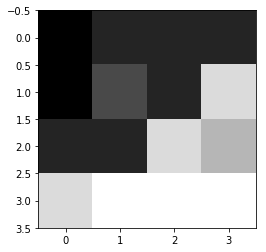

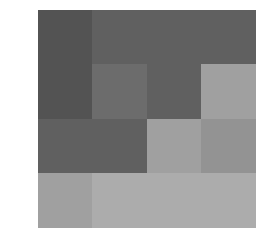

[0.125  0.375  0.0625 0.     0.     0.0625 0.1875 0.1875]
[1. 4. 4. 4. 4. 4. 6. 7.]
[[0 1 1 1]
 [0 2 1 6]
 [1 1 6 5]
 [6 7 7 7]]
[[1 4 4 4]
 [1 4 4 6]
 [4 4 6 4]
 [6 7 7 7]]


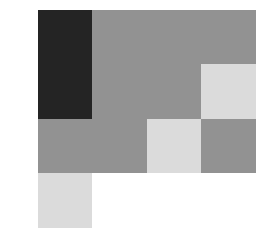

Displaying table  2


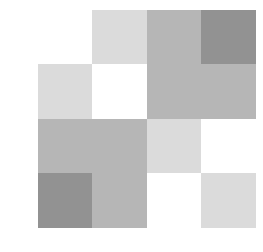

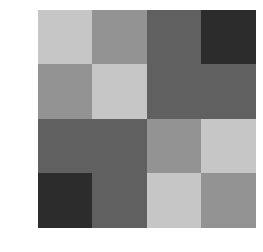

[0.125 0.    0.375 0.    0.    0.25  0.    0.25 ]
[1. 1. 4. 4. 4. 5. 5. 7.]
[[7 6 5 4]
 [6 7 5 5]
 [5 5 6 7]
 [4 5 7 6]]
[[7 5 5 4]
 [5 7 5 5]
 [5 5 5 7]
 [4 5 7 5]]


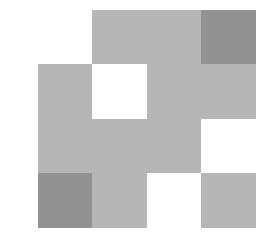

Displaying table  3


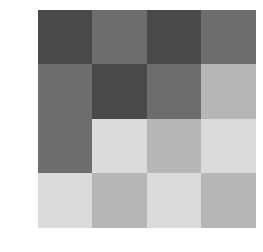

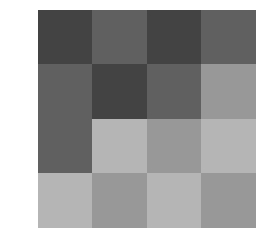

[0.1875 0.     0.3125 0.     0.     0.     0.25   0.25  ]
[1. 1. 4. 4. 4. 4. 5. 7.]
[[2 3 2 3]
 [3 2 3 5]
 [3 6 5 6]
 [6 5 6 5]]
[[4 4 4 4]
 [4 4 4 4]
 [4 5 4 5]
 [5 4 5 4]]


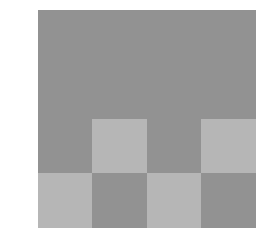

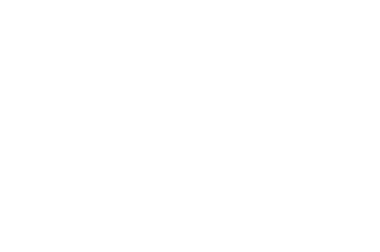

In [33]:
#Initialize Tables
list1 = [[0,1,1,1],[0,2,1,6],[1,1,6,5],[6,7,7,7]]
table1 = np.array(list1)

list2 = [[7,6,5,4],[6,7,5,5],[5,5,6,7],[4,5,7,6]]
table2 = np.array(list2)

list3 = [[2,3,2,3],[3,2,3,5],[3,6,5,6],[6,5,6,5]]
table3 = np.array(list3)

#The piecewise function used to perform the contrast stretch (float32 format)
def contrastStretchFunction(x,pl,ph):
    if x<pl:
        return 0
    elif x>ph:
        return 1
    else:
        return (x-pl)/(ph-pl)
            
#Performs a contrast stretch on a float32 image, taking into account the outliers
def contrastStretch(image):
    q1 = np.percentile(image,25)
    q3 = np.percentile(image,75)
    iqr = q3-q1
    pl = q1-1.5*iqr
    ph = q3+1.5*iqr
    
    for (x,y),value in np.ndenumerate(image):
        image[x,y] = contrastStretchFunction(value,pl,ph)
    return image

#Gets the Histogram of an Image
def getHistogram(image,max):
    histogram,bin_edges = np.histogram(image,max+1)
    
    return histogram

#Gets the probability of each grey level from a histogram
def getProbs(histogram):
    n = sum(histogram)
    probs = histogram/n
    return probs
    
#Get the cumulative probs
def getCumulative(probs):
    return np.cumsum(probs)

#Get new mapping from cumulative distribution
def CDFToMap(cdf,max):
    return np.round(max*cdf)

#Add up probabilities up to k
def getSk(probs,max):
    sk = []
    for k in range(max+1):
        newsk = 0
        for j in range(k+1):
            newsk += probs[j]
        sk.append(newsk)
    return np.round(max*np.array(sk))

#Perform Histogram Equalization
#TODO: FIX THIS
def histogramEqualization(image,max):
    histogram = getHistogram(image,max)
    probs = getProbs(histogram)
    #cdf = getCumulative(probs)
    #myMap = CDFToMap(cdf,max)
    myMap = getSk(probs,max)
    for (x,y),value in np.ndenumerate(image):
        image[x,y] = myMap[value] 
    return image

#Display the original table as well as a contrast-stetched one and a histogrammed one
def displayTableContrastHistogram(table,number,max):
    print("Displaying table ",number)
    displayImage(table,max)
    tableC = im2float32(copy.deepcopy(table))
    tableH = copy.deepcopy(table)
    displayImage(contrastStretch(tableC),1)
    displayImage(histogramEqualization(tableH,max),max)


displayTableContrastHistogram(table1,1,7)
displayTableContrastHistogram(table2,2,7)
displayTableContrastHistogram(table3,3,7)

Contrast Stretching takes the existing distribution and "stretches" it across the full dynamic range. Histogram Equalization, on the other hand, attempts to flatten the distribution of the image so that, ideally, any point along the full dynamic range is equally likely to occur in the image.

<b>Question 3:</b> 
<ol>
    <li>What effect would setting to zero the lower-order bit planes have on the histogram of an image in general?
        <ul>
            <li>The histogram would shift to the left, resulting in a darker image
        </ul>
    <li>What would be the effect on the histogram if we set to zero the higher-order bit planes instead?
        <ul>
            <li>This would have the effect of removing certain multiples from the histogram. Thus there would be gaps in the histogram as well as an overall shift to the left.
        </ul>
</ol>

<b>Question 4:</b> Suppose that a digital image is subjected to histogram equalization. Show that a second pass of histogram equal-ization will produce exactly the same result as the first pass.

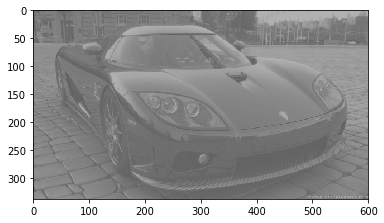

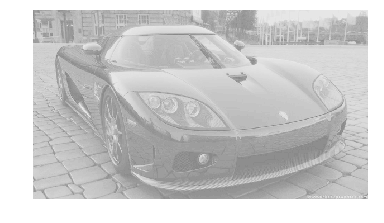

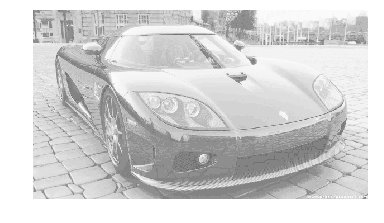

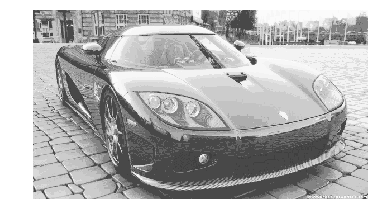

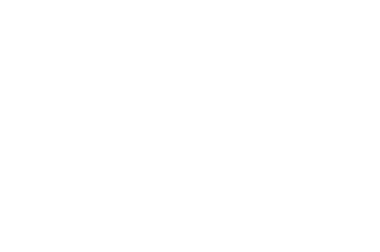

In [13]:
car = plt.imread("car.png")
displayImage(car,1)
car1 = copy.deepcopy(car)
car1 = im2int8(car1)
displayImage(histogramEqualization(car1,255),255)
car2 = copy.deepcopy(car1)
displayImage(histogramEqualization(car2,255),255)
car3 = copy.deepcopy(car2)
displayImage(histogramEqualization(car3,255),255)

<b>Question 5: </b>Given a 3-bit 8×8 image with its histogram shown in Table 2, perform a histogram matching using the desiredhistogram shown in Table 3.
<img src="table2and3.png">

<b>Question 6: </b>A 3-bit imageTis given below.  Perform an adaptive histogram equalization on the pixels of T (excluding theborder pixels) using a 3×3 tile.

<img src="T.png">

<h2 align="center">Lab Exercises</h1>

<b>Question 1: </b>Implement a functionimg_out = histeq_DIP(img_in)which performs histogram equalization onimg_in,whereimg_outis the output image.  Test your implementation on image ‘fractured_spine.tif’.  For this exercise,you should attempt to put the results in a very short report that includes the original image, a plot of its histogram,a plot of the histogram-equalization transformation function, the enhanced image, and a plot of its histogram. Usethis information to explain why the resulting image was enhanced as it was.

<b>Question 2: </b>
<ol>
    <li>Implement a histogram matching functionimg_out = histogram_matching_DIP(img_in, p), whereimg_inis an input image,pis a specified histogram, andimg_outis the output image.
    <li>Apply your implementation to image ‘aerial_washedout.png’ using the histograms of images ‘pollen_1_he.png’,and ‘mars_moon.png’.
    <li>Apply your implementation to image ‘mars_moon.png’ using the histograms of image ‘pollen_1_he.png’.
</ol>

<b>Question 3: </b>Implement an adaptive histogram equalization function.  To do this,  you need to divide an image into smallblocks (or tiles). Then each of these blocks are histogram equalized as usual. In adaptive histogram equalization,how would you deal with the issues caused by the following? Test your program for images ‘mars_moon.png’ and‘car.png’.
<ol>
    <li>The resulting image might have blocking effects, i.e., the borders of the tiles are clearly visible.?
    <li>Noise or outlier pixels
</ol>

<b>Question 4: </b>Perform adaptive histogram equalization for images ‘mars_moon.png’ and ‘car.png’ using matlabadapthisteqor python scikit-image package. (See the example codeplot_equalize.py).